In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [3]:
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)

In [5]:
df = pd.read_excel("C:/Users/lenovo/Documents/datascienceproject/online_retail_II.xlsx", sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [8]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [9]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [10]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [13]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [14]:
df["Invoice"].str.replace("[0-9]", "", regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [15]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [23]:
df["StockCode"] = df["StockCode"].astype(str)
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [24]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [25]:
df[df["StockCode"].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


DATA CLEANING

In [26]:
cleaned_df = df.copy()

In [27]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)

In [28]:
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True

)
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [35]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
     | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
     | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [40]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350943.00,350943,350943.00,350943.00
mean,13.70,2010-07-05 17:09:34.748549120,2.98,15360.24
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.07,NaN,4.42,1678.20


In [37]:
cleaned_df.dropna(subset=["Customer ID"], inplace= True)

In [44]:
len(cleaned_df[cleaned_df["Price"] == 0])

0

In [43]:
cleaned_df = cleaned_df[cleaned_df["Price"]> 0]

In [49]:
print(len(cleaned_df)/len(df)*100, "percent")

66.7825014606222 percent


In [50]:
cleaned_df["saleslinetotal"] = cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13680\844988088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["saleslinetotal"] = cleaned_df["Quantity"]*cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,saleslinetotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [53]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        monetaryvalue = ("saleslinetotal", "sum"),
        frequency = ("Invoice", "nunique"),
        lastinvoicedate = ("InvoiceDate", "max")
    )
aggregated_df.head(7)

,Customer ID,monetaryvalue,frequency,lastinvoicedate
0,12346.00,144.02,2,2010-06-28 13:53:00
1,12347.00,966.87,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,1946.64,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
5,12352.00,332.40,2,2010-11-29 10:07:00
6,12353.00,317.76,1,2010-10-27 12:44:00


In [54]:
max_invoicedate = aggregated_df["lastinvoicedate"].max()
aggregated_df["recency"] = (max_invoicedate - aggregated_df["lastinvoicedate"]).dt.days
aggregated_df.head()

,Customer ID,monetaryvalue,frequency,lastinvoicedate,recency
0,12346.00,144.02,2,2010-06-28 13:53:00,164
1,12347.00,966.87,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,1946.64,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


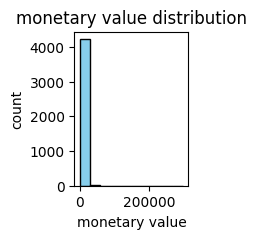

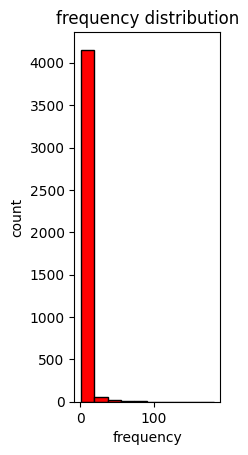

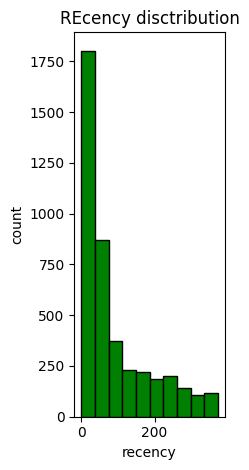

In [61]:
plt.figure(figsize=(5,2))

plt.subplot(1,3,1)
plt.hist(aggregated_df["monetaryvalue"], bins=10, color='skyblue', edgecolor='black')
plt.title("monetary value distribution")
plt.xlabel("monetary value")
plt.ylabel("count")
plt.show()
plt.subplot(1,3,2)
plt.hist(aggregated_df["frequency"], bins=10, color='red', edgecolor='black')
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("count")
plt.show()
plt.subplot(1,3,3)
plt.hist(aggregated_df["recency"], bins=10, color='green', edgecolor='black')
plt.title("REcency disctribution")
plt.xlabel("recency")
plt.ylabel("count")

plt.tight_layout()
plt.show()


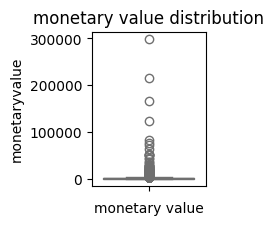

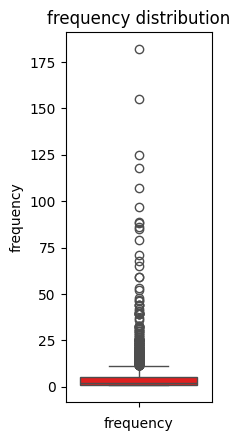

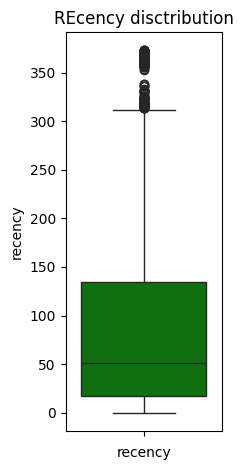

In [65]:
plt.figure(figsize=(5,2))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["monetaryvalue"], color='skyblue')
plt.title("monetary value distribution")
plt.xlabel("monetary value")

plt.show()
plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["frequency"], color='red')
plt.title("frequency distribution")
plt.xlabel("frequency")

plt.show()
plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["recency"], color='green')
plt.title("REcency disctribution")
plt.xlabel("recency")
plt.tight_layout()
plt.show()


In [70]:
mq1 = aggregated_df["monetaryvalue"].quantile(0.25)
mq3 = aggregated_df["monetaryvalue"].quantile(0.75)
miqr = mq3 - mq1
monetary_outliers_df = aggregated_df[(aggregated_df["monetaryvalue"]> (mq3 + 1.5*miqr)) | (aggregated_df["monetaryvalue"]< (mq1 - 1.5*miqr))]
monetary_outliers_df.describe()

,Customer ID,monetaryvalue,frequency,lastinvoicedate,recency
count,412.00,412.00,412.00,412,412.00
mean,15083.30,10433.19,17.03,2010-11-10 21:01:28.106796032,28.67
min,12357.00,3308.90,1.00,2009-12-10 18:03:00,0.00
25%,13561.75,3957.30,8.00,2010-11-08 13:45:45,3.00
50%,14956.50,5389.85,12.00,2010-11-26 15:03:30,13.00
75%,16653.00,8847.18,18.00,2010-12-06 12:47:30,31.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,364.00
std,1733.82,22291.55,19.38,NaN,49.15


In [71]:
mq1 = aggregated_df["frequency"].quantile(0.25)
mq3 = aggregated_df["frequency"].quantile(0.75)
miqr = mq3 - mq1
frequency_outliers_df = aggregated_df[(aggregated_df["frequency"]> (mq3 + 1.5*miqr)) | (aggregated_df["frequency"]< (mq1 - 1.5*miqr))]
frequency_outliers_df.describe()

,Customer ID,monetaryvalue,frequency,lastinvoicedate,recency
count,269.00,269.00,269.00,269,269.00
mean,15392.80,12298.98,23.70,2010-11-23 16:23:39.033456896,15.87
min,12437.00,898.14,12.00,2010-05-12 16:51:00,0.00
25%,13831.00,3638.01,13.00,2010-11-21 10:38:00,2.00
50%,15527.00,5572.67,17.00,2010-12-02 12:09:00,7.00
75%,16883.00,10269.46,24.00,2010-12-07 12:43:00,18.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,211.00
std,1748.38,27198.75,21.58,NaN,26.79


In [72]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,monetaryvalue,frequency,lastinvoicedate,recency
count,3785.00,3785.00,3785.00,3785,3785.00
mean,15372.18,773.15,2.86,2010-09-03 14:28:03.788639232,96.95
min,12346.00,2.95,1.00,2009-12-01 12:55:00,0.00
25%,13909.00,236.40,1.00,2010-07-08 16:56:00,22.00
50%,15379.00,508.57,2.00,2010-10-12 17:17:00,58.00
75%,16847.00,1115.97,4.00,2010-11-17 13:42:00,154.00
max,18287.00,3298.60,11.00,2010-12-09 20:01:00,373.00
std,1691.82,714.34,2.23,NaN,98.12


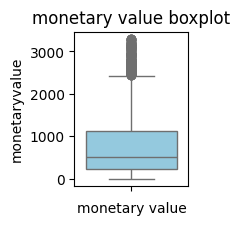

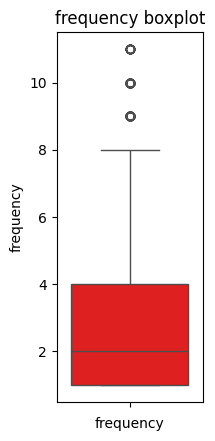

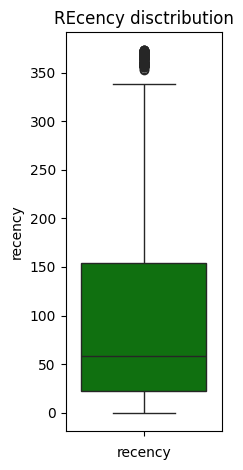

In [74]:
plt.figure(figsize=(5,2))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["monetaryvalue"], color='skyblue')
plt.title("monetary value boxplot")
plt.xlabel("monetary value")

plt.show()
plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["frequency"], color='red')
plt.title("frequency boxplot")
plt.xlabel("frequency")

plt.show()
plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["recency"], color='green')
plt.title("REcency disctribution")
plt.xlabel("recency")
plt.tight_layout()
plt.show()


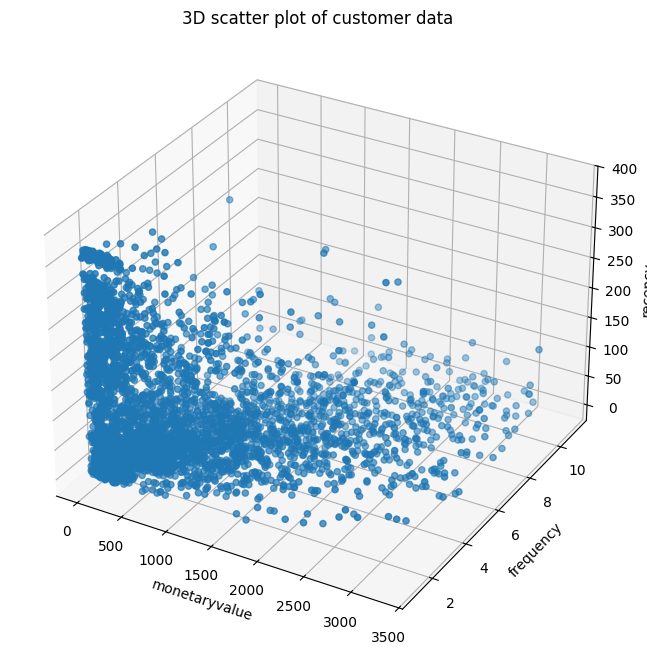

In [84]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(non_outliers_df["monetaryvalue"], non_outliers_df["frequency"], non_outliers_df["recency"])
ax.set_xlabel('monetaryvalue')
ax.set_ylabel('frequency')
ax.set_zlabel('recency')
ax.set_title("3D scatter plot of customer data")
plt.show()

In [79]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["monetaryvalue", "frequency", "recency"]])
scaled_data

array([[-0.88083728, -0.3837042 ,  0.68341659],
       [ 0.27122348, -0.3837042 , -0.96777989],
       [-0.77283465, -0.83167471, -0.24410736],
       ...,
       [-0.57690661, -0.83167471,  2.01864337],
       [ 0.24522388, -0.3837042 ,  0.14321033],
       [ 1.07896109,  0.51223682, -0.81489133]])

In [81]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ["monetaryvalue", "frequency", "recency"])
scaled_data_df

,monetaryvalue,frequency,recency
0,-0.88,-0.38,0.68
1,0.27,-0.38,-0.97
2,-0.77,-0.83,-0.24
3,1.64,-0.38,-0.56
4,-0.66,-0.83,-0.89
...,...,...,...
4243,-0.29,1.41,-0.81
4244,-0.53,-0.83,-0.32
4245,-0.58,-0.83,2.02
4246,0.25,-0.38,0.14


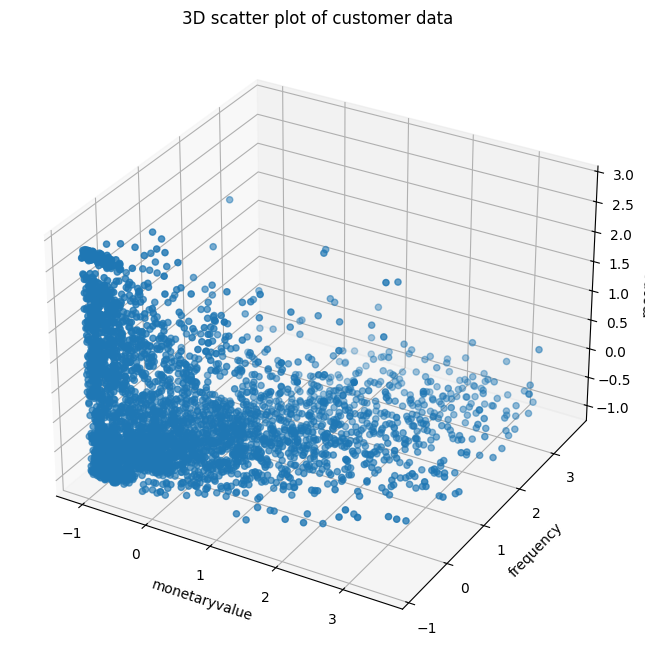

In [83]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(scaled_data_df["monetaryvalue"], scaled_data_df["frequency"], scaled_data_df["recency"])
ax.set_xlabel('monetaryvalue')
ax.set_ylabel('frequency')
ax.set_zlabel('recency')
ax.set_title("3D scatter plot of customer data")
plt.show()

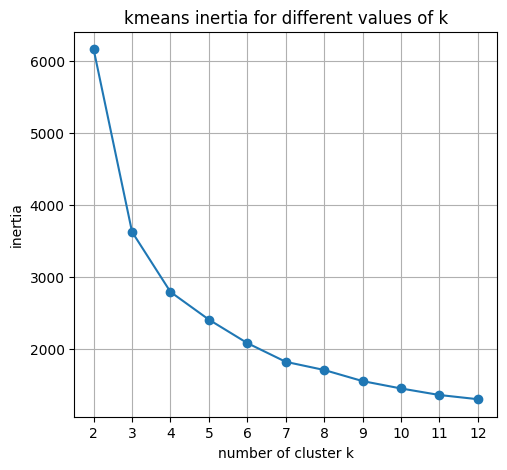

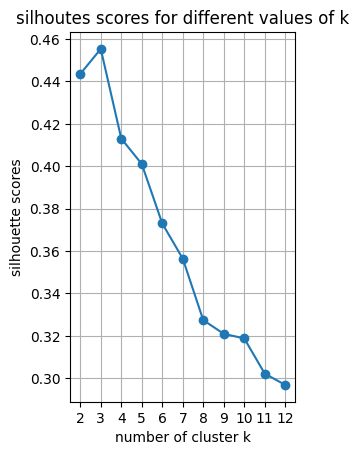

In [86]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state= 42, max_iter= 600)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker= 'o')
plt.title("kmeans inertia for different values of k")
plt.xlabel("number of cluster k")
plt.ylabel("inertia")

plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker= 'o')
plt.title("silhoutes scores for different values of k")
plt.xlabel("number of cluster k")
plt.ylabel("silhouette scores")

plt.xticks(k_values)
plt.grid(True)
plt.show()

In [89]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter= 600)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([0, 2, 2, ..., 0, 2, 1], dtype=int32)

In [90]:
non_outliers_df["clusters"] = cluster_labels
non_outliers_df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13680\3376744935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["clusters"] = cluster_labels


,Customer ID,monetaryvalue,frequency,lastinvoicedate,recency,clusters
0,12346.00,144.02,2,2010-06-28 13:53:00,164,0
1,12347.00,966.87,2,2010-12-07 14:57:00,2,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4243,18283.00,563.19,6,2010-11-22 15:30:00,17,1
4244,18284.00,391.28,1,2010-10-04 11:33:00,66,2
4245,18285.00,361.10,1,2010-02-17 10:24:00,295,0
4246,18286.00,948.30,2,2010-08-20 11:57:00,111,2


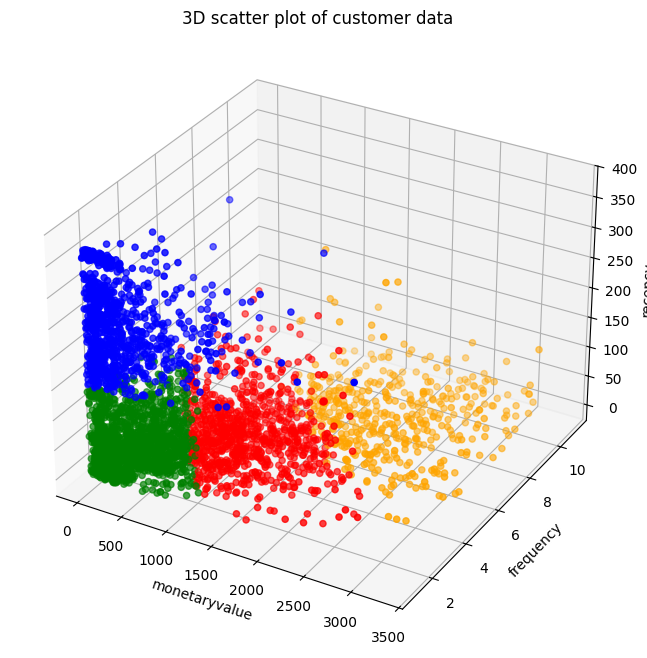

In [91]:
cluster_colors = {
    0: "blue",
    1: "red",
    2: "green",
    3: "orange"

}
colors = non_outliers_df['clusters'].map(cluster_colors)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(non_outliers_df["monetaryvalue"], non_outliers_df["frequency"], non_outliers_df["recency"], c= colors, marker = 'o')
ax.set_xlabel('monetaryvalue')
ax.set_ylabel('frequency')
ax.set_zlabel('recency')
ax.set_title("3D scatter plot of customer data")
plt.show()

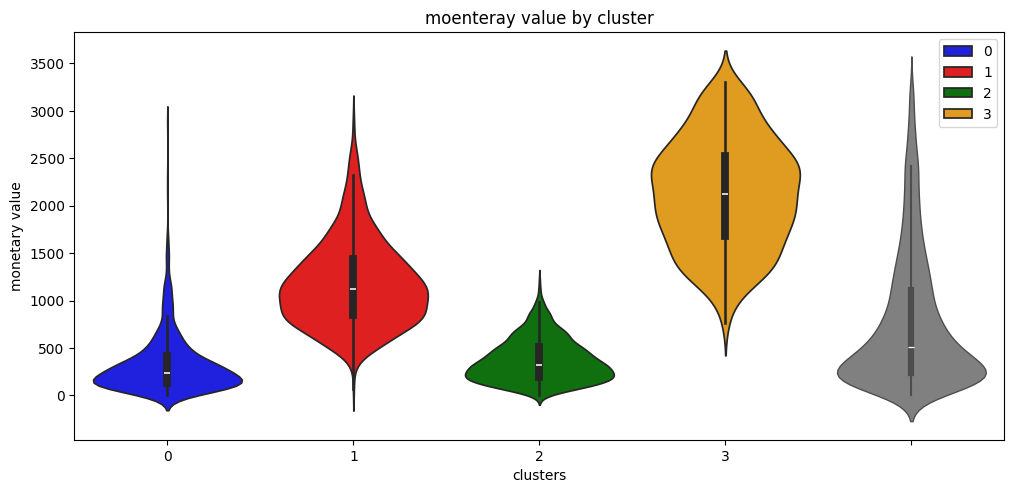

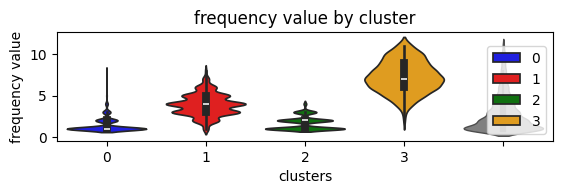

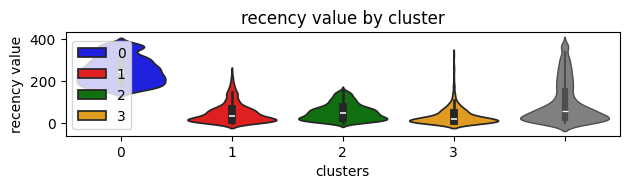

In [94]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df["clusters"], y = non_outliers_df["monetaryvalue"], palette= cluster_colors, hue= non_outliers_df["clusters"])
sns.violinplot(y=non_outliers_df["monetaryvalue"], color='gray', linewidth= 1.0)
plt.title('moenteray value by cluster')
plt.ylabel('monetary value')
plt.show()

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df["clusters"], y = non_outliers_df["frequency"], palette= cluster_colors, hue= non_outliers_df["clusters"])
sns.violinplot(y=non_outliers_df["frequency"], color='gray', linewidth= 1.0)
plt.title('frequency value by cluster')
plt.ylabel('frequency value')
plt.show()

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df["clusters"], y = non_outliers_df["recency"], palette= cluster_colors, hue= non_outliers_df["clusters"])
sns.violinplot(y=non_outliers_df["recency"], color='gray', linewidth= 1.0)
plt.title('recency value by cluster')
plt.ylabel('recency value')
plt.tight_layout()
plt.show()

In [95]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df)
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["clusters"] = -1
frequency_only_outliers["clusters"] = -2
monetary_and_frequency_outliers["clusters"] = -3
outlier_cluster_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_cluster_df

,Customer ID,monetaryvalue,frequency,lastinvoicedate,recency,clusters
9,12357.00,10468.27,1,2010-11-16 10:05:00,23,-1
25,12380.00,4131.84,4,2010-08-31 14:54:00,100,-1
41,12409.00,11171.42,4,2010-10-15 10:24:00,55,-1
47,12415.00,17985.44,4,2010-11-29 15:07:00,10,-1
59,12429.00,3515.55,5,2010-12-09 12:05:00,0,-1
...,...,...,...,...,...,...
4200,18225.00,5937.33,15,2010-12-09 15:46:00,0,-2
4201,18226.00,4776.81,15,2010-11-26 15:51:00,13,-2
4205,18231.00,4266.26,23,2010-10-29 14:17:00,41,-2
4214,18245.00,3293.79,13,2010-11-25 16:52:00,14,-2
